In [13]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
df = pd.read_csv('data/house_rentals.csv')

In [3]:
df.head()

,url,listing_type,name,price,category,bedrooms,bathrooms,floor_area,location,condition,amenities,region,locality,parking_space,is_furnished,lat,lng
0,https://tonaton.com/a-MfYFNdCgCTytOcmvZIh0Kzrj...,rentals,"2bdrm Apartment in Charclem Ventures, East Leg...",9196,Flats,2.0,2.0,145.0,"Greater Accra, East Legon",Used,"24-hour Electricity,Air Conditioning,Balcony,C...",Greater Accra,East Legon,False,Semi-Furnished,5.635828,-0.161359
1,https://tonaton.com/a-MfYFNdCgwtb8Itol9odpMPvC...,rentals,"2bdrm Apartment in , Dzorwulu for rent",7500,Flats,2.0,2.0,100.0,"Greater Accra, Dzorwulu",Used,"24-hour Electricity,Air Conditioning,Apartment...",Greater Accra,Dzorwulu,False,Unfurnished,5.614123,-0.195647
2,https://tonaton.com/a-MfYFNdCgPjnzPYwNFEv5JrGy...,rentals,"4bdrm House in Lakeside Estate, for Rent",11200,Detached,4.0,5.0,100.0,"Greater Accra, Ashaley Botwe, Lake Side Estate",New,"Tiled Floor,Chandelier,Dining Area,Balcony,Pop...",Greater Accra,Ashaley Botwe,False,Semi-Furnished,5.680213,-0.137248
3,https://tonaton.com/a-MfYFNdCgwmXHQRNJiSR3rok8...,rentals,"3bdrm House in Ayathar Bedroom, Teshie for Rent",2500,Detached,3.0,3.0,17.0,"Greater Accra, Teshie",Used,"Pop Ceiling,Pre-Paid Meter,24-hour Electricity...",Greater Accra,Teshie,False,Semi-Furnished,5.583166,-0.104608
4,https://tonaton.com/a-MfYFNdCgn3Bcs511lKnFE19i...,rentals,"3bdrm House in Manet Viile Estate, Spintex for...",9146,Detached,3.0,3.0,160.0,"Greater Accra, Spintex",Used,"Pre-Paid Meter,Dining Area,Chandelier,Balcony,...",Greater Accra,Spintex,False,Semi-Furnished,5.637614,-0.126606


In [25]:
df.dtypes

url               object
listing_type      object
name              object
price              int64
category           int64
bedrooms         float64
bathrooms        float64
floor_area       float64
location          object
condition          int64
amenities         object
region            object
locality          object
parking_space       bool
is_furnished      object
lat              float64
lng              float64
dtype: object

## Category

In [16]:
df['category'].unique()

array(['Flats', 'Detached', 'Townhouse', 'Duplex', 'Mansion',
       'Semi-Detached'], dtype=object)

Set up an order for this data

In [18]:
ordered_categories = ['Flats','Duplex','Townhouse','Semi-Detached','Detached','Mansion']
category = {c:i for i,c in enumerate(ordered_categories)}
category

{'Flats': 0,
 'Duplex': 1,
 'Townhouse': 2,
 'Semi-Detached': 3,
 'Detached': 4,
 'Mansion': 5}

In [20]:
df['category'] = df['category'].apply(lambda c:category[c])

## Condition

In [22]:
df['condition'].unique()

array(['Used', 'New', 'Renovated'], dtype=object)

In [23]:
ordered_conditions = ['Used','Renovated','New']
condition = {c:i for i,c in enumerate(ordered_conditions)}
condition

{'Used': 0, 'Renovated': 1, 'New': 2}

In [24]:
df['condition'] = df['condition'].apply(lambda c:condition[c])

## Furnished

In [31]:
df['is_furnished'].unique()

array(['Semi-Furnished', 'Unfurnished', 'Furnished'], dtype=object)

In [33]:
ordered_furnished = ['Unfurnished','Semi-Furnished','Furnished']
furnished = {c:i for i,c in enumerate(ordered_furnished)}
furnished

{'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}

In [34]:
df['is_furnished'] = df['is_furnished'].apply(lambda c:furnished[c])

## Parking space

In [36]:
df['parking_space'] = df['parking_space']*1

## Amenities

In [4]:
amenities = {}
for row in df['amenities'].apply(lambda a:a.split(',')):
    for item in row:
        count = amenities.get(item,0) 
        amenities[item] = count+1

In [5]:
num_unique_amenities = len(amenities)
print(f'there are {num_unique_amenities} unique amenities')
pd.DataFrame({'Amenities':amenities.keys(),'Count':amenities.values()})

there are 18 unique amenities


,Amenities,Count
0,24-hour Electricity,15255
1,Air Conditioning,9563
2,Balcony,11458
3,Chandelier,6472
4,Dining Area,11536
5,Hot Water,8530
6,Kitchen Cabinets,15420
7,Kitchen Shelf,11190
8,Pop Ceiling,14212
9,Pre-Paid Meter,15521


In [6]:
columns = {a:i for i,a in enumerate(list(amenities.keys()))}
def build_amenities_matrix(amenities,columns):
    am = amenities.split(',')
    arr = np.zeros(len(columns),dtype=np.int8)
    for a in am:
        i = columns[a]
        arr[i]=1
    series = pd.Series(arr,index=columns.keys())
    return series

In [7]:
amenities_df = df['amenities'].apply(lambda a: build_amenities_matrix(a,columns))

In [8]:
amenities_df.head()

,24-hour Electricity,Air Conditioning,Balcony,Chandelier,Dining Area,Hot Water,Kitchen Cabinets,Kitchen Shelf,Pop Ceiling,Pre-Paid Meter,Tiled Floor,Refrigerator,Wardrobe,Wi-Fi,Apartment,Microwave,Dishwasher,TV
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0
3,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0
4,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0


## Explore locations covered by the data
Finding out how much data is spread across the country.

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [10]:
df['region'].value_counts()

region
Greater Accra      16549
Ashanti              702
Central Region       284
Northern Region      203
Eastern Region        64
Western Region        58
Brong Ahafo           28
Volta Region           2
Name: count, dtype: int64

In [11]:
df[['lat','lng']].head()

,lat,lng
0,5.635828,-0.161359
1,5.614123,-0.195647
2,5.680213,-0.137248
3,5.583166,-0.104608
4,5.637614,-0.126606


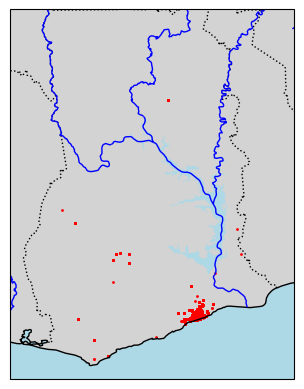

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-3.5, 1.5, 4.5, 11], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

coordinates = df[['lng','lat']].to_numpy()
for lon,lat in tqdm(coordinates):
    plt.scatter(lon, lat, color='red', s=1, transform=ccrs.PlateCarree())
    
plt.show()

Some locations are under-represented in the data. Instead of using location names like `region` I would use only the coordinates (`longitude` and `latitude`). This way I get to save on dimensions and also maintain more accurate information about the locations involved.

## Final touch on preprocessing

In [38]:
df.drop(columns=['url','listing_type','name','location','amenities','region','locality'],inplace=True)

In [40]:
df = pd.concat([df,amenities_df],axis=1)

In [41]:
df.head()

,price,category,bedrooms,bathrooms,floor_area,condition,parking_space,is_furnished,lat,lng,...,Pop Ceiling,Pre-Paid Meter,Tiled Floor,Refrigerator,Wardrobe,Wi-Fi,Apartment,Microwave,Dishwasher,TV
0,9196,0,2.0,2.0,145.0,0,0,1,5.635828,-0.161359,...,1,1,1,1,1,1,0,0,0,0
1,7500,0,2.0,2.0,100.0,0,0,0,5.614123,-0.195647,...,1,1,1,0,0,1,1,0,0,0
2,11200,4,4.0,5.0,100.0,2,0,1,5.680213,-0.137248,...,1,1,1,1,1,0,1,1,1,0
3,2500,4,3.0,3.0,17.0,0,0,1,5.583166,-0.104608,...,1,1,1,0,0,0,0,0,1,0
4,9146,4,3.0,3.0,160.0,0,0,1,5.637614,-0.126606,...,1,1,1,0,1,1,0,1,1,0


Checking for `null` and `na`

In [43]:
df.isna().sum()

price                  0
category               0
bedrooms               0
bathrooms              0
floor_area             0
condition              0
parking_space          0
is_furnished           0
lat                    0
lng                    0
24-hour Electricity    0
Air Conditioning       0
Balcony                0
Chandelier             0
Dining Area            0
Hot Water              0
Kitchen Cabinets       0
Kitchen Shelf          0
Pop Ceiling            0
Pre-Paid Meter         0
Tiled Floor            0
Refrigerator           0
Wardrobe               0
Wi-Fi                  0
Apartment              0
Microwave              0
Dishwasher             0
TV                     0
dtype: int64

In [44]:
df.isnull().sum()

price                  0
category               0
bedrooms               0
bathrooms              0
floor_area             0
condition              0
parking_space          0
is_furnished           0
lat                    0
lng                    0
24-hour Electricity    0
Air Conditioning       0
Balcony                0
Chandelier             0
Dining Area            0
Hot Water              0
Kitchen Cabinets       0
Kitchen Shelf          0
Pop Ceiling            0
Pre-Paid Meter         0
Tiled Floor            0
Refrigerator           0
Wardrobe               0
Wi-Fi                  0
Apartment              0
Microwave              0
Dishwasher             0
TV                     0
dtype: int64

It appears that data is clean

## Visualizing data

In [97]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [61]:
def plot3d(X, groups=None):
    x = X[:,0]
    y = X[:,1]
    z = X[:,2]
    # Create a figure with subplots
    fig = plt.figure(figsize=(24, 16))

    # 3D Plot
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.scatter(x, y, z, c=groups)
    ax1.set_title("3D Surface Plot")

    # XY Plane (Z = 0 slice)
    ax2 = fig.add_subplot(222)
    ax2.scatter(x, y, c=groups)
    ax2.set_title("XY Plane (Z = 0)")

    # XZ Plane (Y = 0 slice)
    ax3 = fig.add_subplot(223)
    ax3.scatter(x, z, c=groups)
    ax3.set_title("XZ Plane (Y = 0)")

    # YZ Plane (X = 0 slice)
    ax4 = fig.add_subplot(224)
    ax4.scatter(y,z,  c=groups)
    ax4.set_title("YZ Plane (X = 0)")

    # Show the plots
    plt.tight_layout()
    plt.show()  

In [130]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
y_df = df['price']
X_df = df.drop(columns=['price'])
X = std_scaler.fit_transform(X_df)
y = min_max_scaler.fit_transform(y_df.to_numpy().reshape(-1, 1)).squeeze()

In [131]:
y.shape

(17890,)

In [132]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [133]:
pca_components_df = pd.DataFrame(pca.components_,columns=X_df.columns)
pca_components_df.T

,0,1,2
category,0.094402,0.443381,-0.107839
bedrooms,0.154060,0.468675,-0.058584
bathrooms,0.189725,0.441255,-0.044283
floor_area,0.041054,-0.011076,0.132251
condition,0.058947,-0.061391,0.125961
parking_space,-0.015026,0.017273,-0.106259
is_furnished,0.236834,-0.167588,-0.236875
lat,-0.021496,-0.041904,0.061883
lng,0.036598,0.026441,0.005919
24-hour Electricity,0.079193,-0.089756,0.102062


I observe that there is a lot of information in the amentities

In [134]:
dominant_components_index = pca_components_df.values.argmax(axis=1)
dominant_components_index

array([14,  1, 18])

In [135]:
pca_components_df.columns[dominant_components_index]

Index(['Hot Water', 'bedrooms', 'Pre-Paid Meter'], dtype='object')

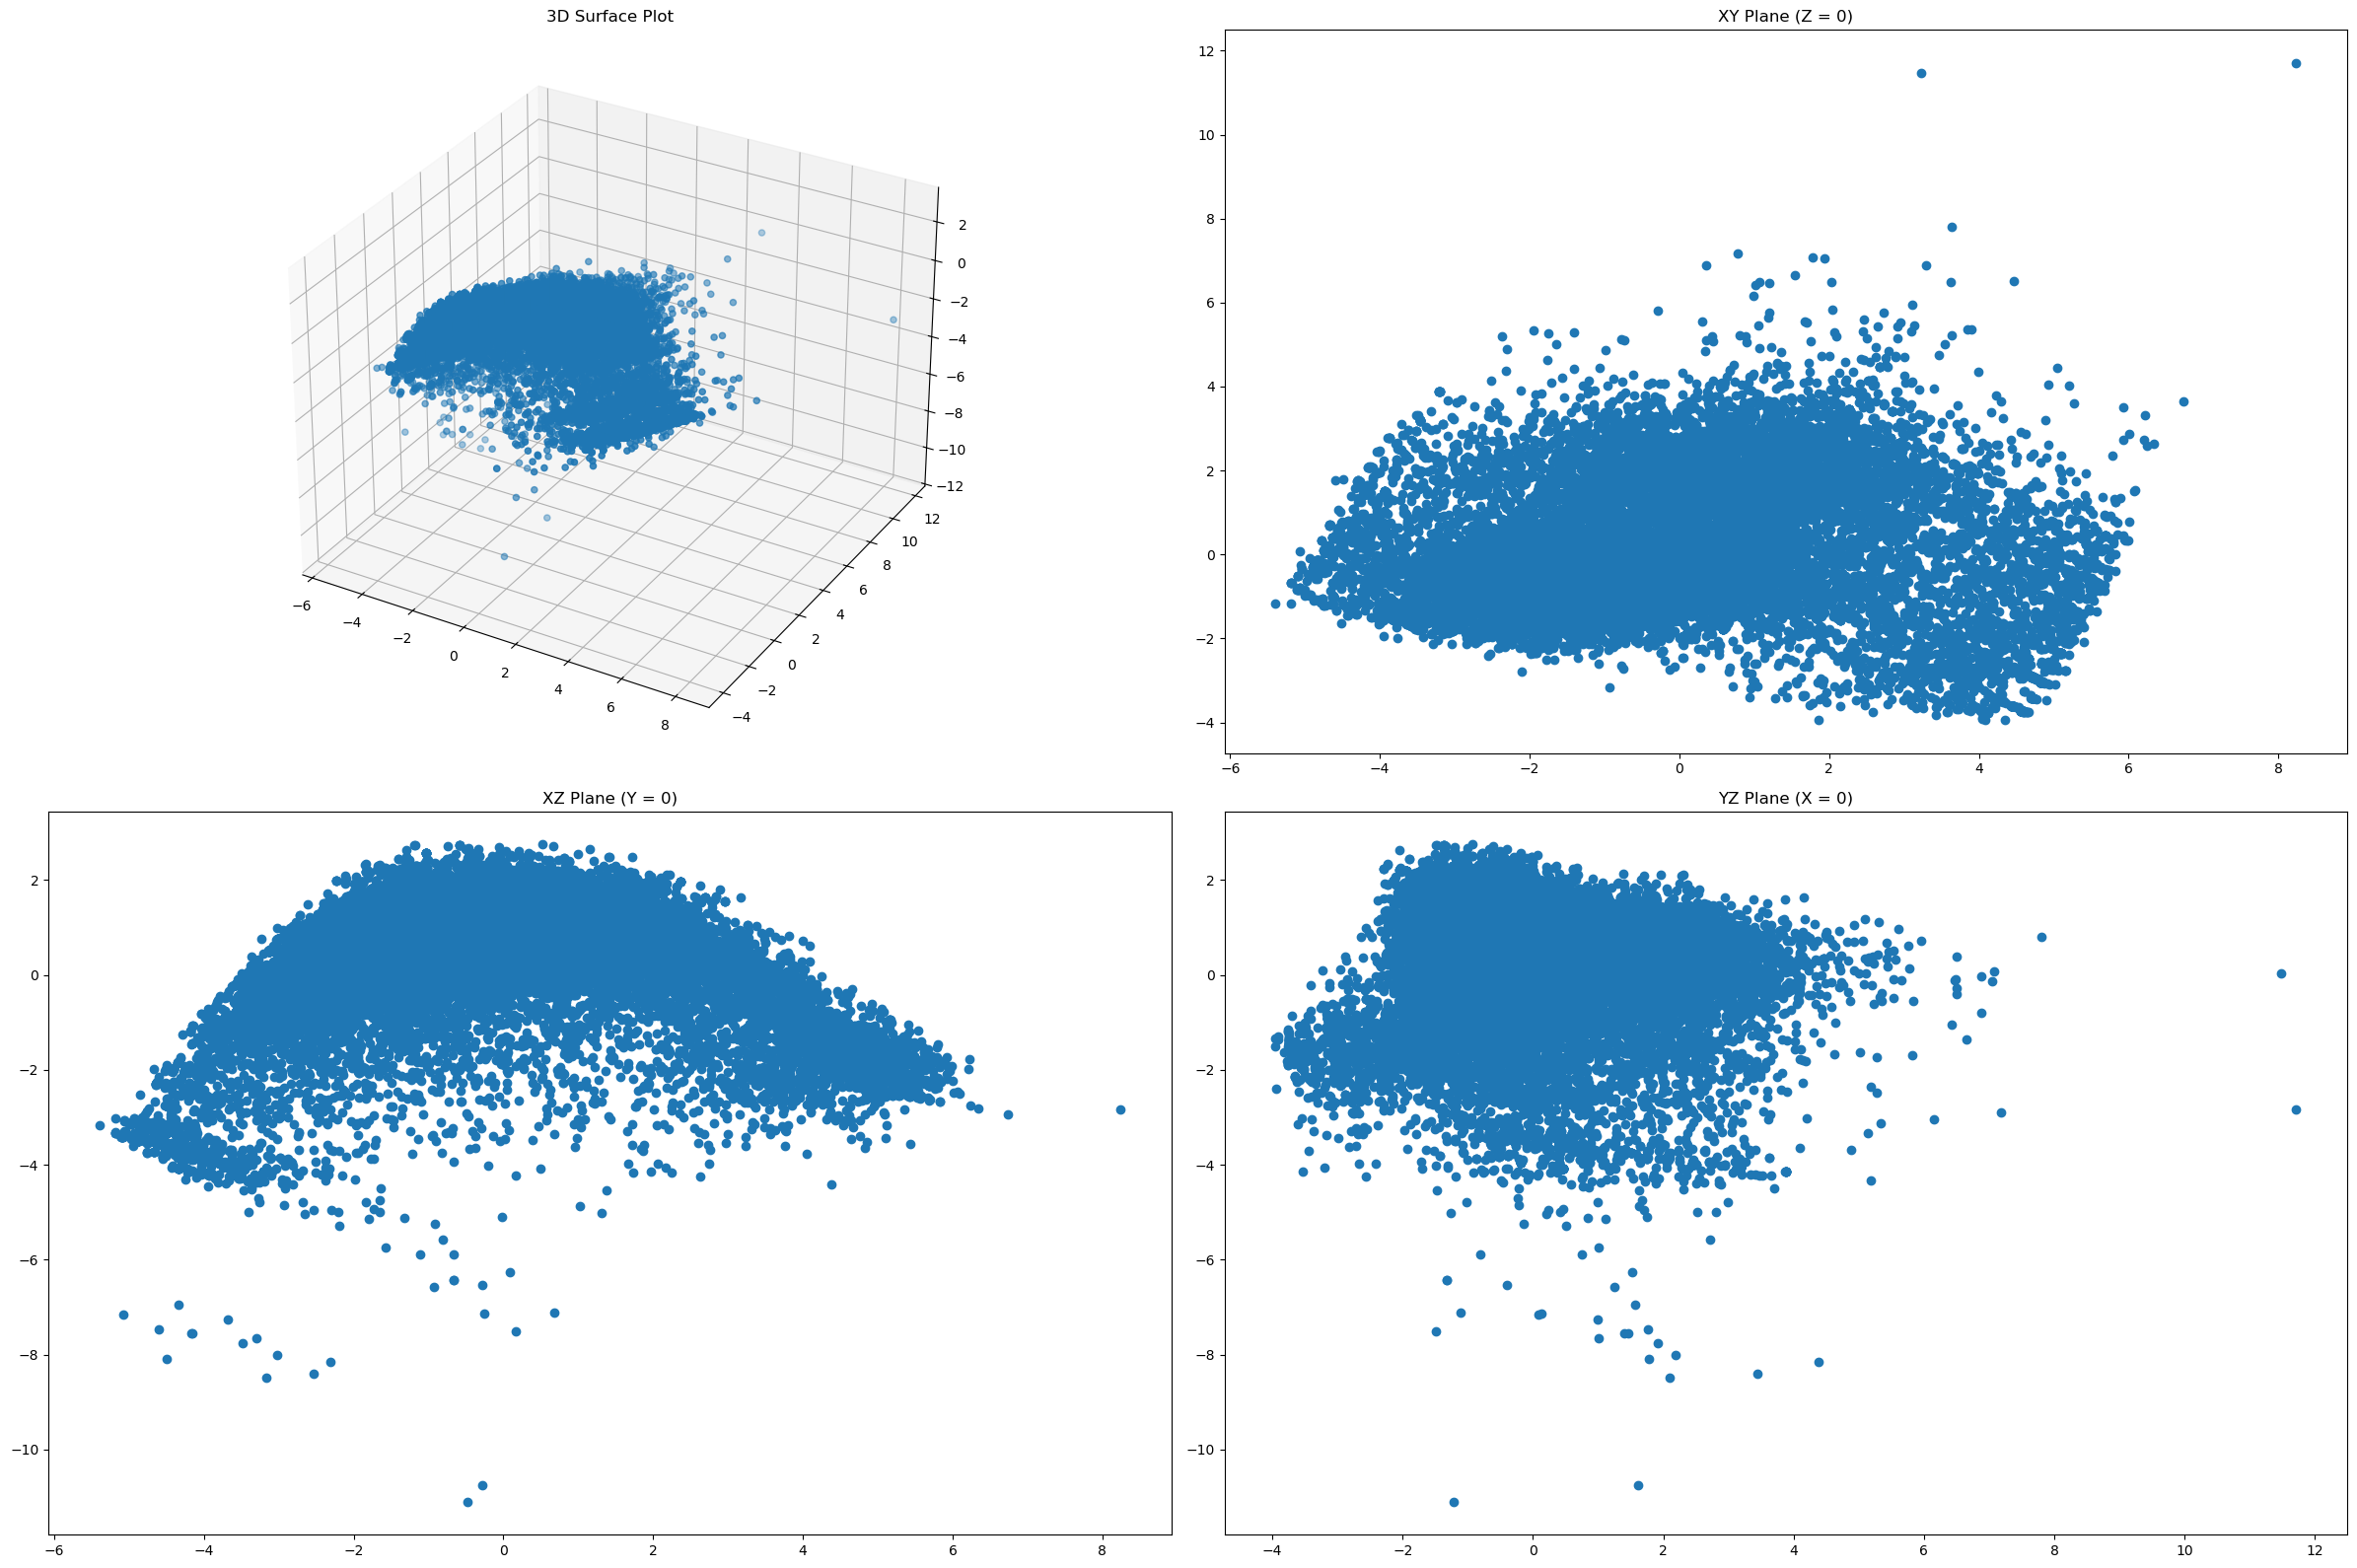

In [136]:
plot3d(X_pca)

In [137]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test =train_test_split(X_pca,y,test_size=0.2,random_state=0)

In [139]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)
train_mse = mean_squared_error(y_train,y_pred)
y_pred = rf.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred)
print(f'Train MSE:\t{min_max_scaler.inverse_transform([[train_mse]]).squeeze()}\nTest MSE:\t{min_max_scaler.inverse_transform([[test_mse]]).squeeze()}')


Train MSE:	553.6255554821025
Test MSE:	1402.4552523531577


In [143]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_train)
train_mse = mean_squared_error(y_train,y_pred)
y_pred = gb.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred)
print(f'Train MSE:\t{min_max_scaler.inverse_transform([[train_mse]]).squeeze()}\nTest MSE:\t{min_max_scaler.inverse_transform([[test_mse]]).squeeze()}')

Train MSE:	1234.258934166787
Test MSE:	1342.5059316593922


In [141]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_train)
train_mse = mean_squared_error(y_train,y_pred)
y_pred = svr.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred)
print(f'Train MSE:\t{min_max_scaler.inverse_transform([[train_mse]]).squeeze()}\nTest MSE:\t{min_max_scaler.inverse_transform([[test_mse]]).squeeze()}')

Train MSE:	1456.915771963938
Test MSE:	1486.3760468939017
